In [73]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
%matplotlib inline
plt.viridis()
import os

In [32]:
ff_w = []
lat_w = []
spikes = {}
state = []
ff_conn = []
lat_conn = []
final_s = []
duration = 0 * second

In [33]:
seed = 7
np.random.seed(seed)
recording_filename_location = "../../synaptogenesis/"
recording_filename = str(np.random.randint(100000, 1000000))


if os.path.isfile(recording_filename_location + recording_filename + ".npz"):
    with np.load(recording_filename_location + recording_filename + ".npz")as init_data:
        print init_data.keys()
        init_ff_w = init_data['ff_w']
        init_lat_w = init_data['lat_w']
        init_ff_conn = init_data['ff_conn']
        init_lat_conn = init_data['lat_conn']
        init_s =  init_data['s']

['lat_w', 'lat_conn', 's', 'ff_w', 'ff_conn']


In [34]:
seed = 7
np.random.seed(seed)
recording_filename_location = "../../synaptogenesis/"
recording_filename = str(np.random.randint(100000, 1000000))


if os.path.isfile(recording_filename_location + recording_filename + ".npz"):
    with np.load(recording_filename_location + "save-" + recording_filename + ".npz")as init_data:
        print init_data.keys()
        ff_w = init_data['ff_w']
        lat_w = init_data['lat_w']
        spikes = init_data['spikes']
        state = init_data['state']
        ff_conn =  init_data['ff_conn']
        lat_conn = init_data['lat_conn']
        final_s = init_data['final_s'].astype(np.int32)
        duration = init_data['duration'] * second
print duration

['spikes', 'lat_w', 'simulator', 'lat_conn', 'final_s', 'state', 'rates', 'duration', 'ff_w', 'ff_conn']
1. s


In [44]:
recording_filename

'685903'

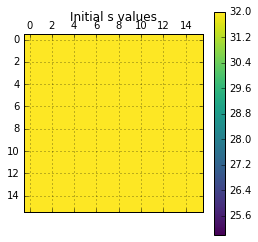

In [65]:
plt.matshow(init_s.reshape(16,16), vmin=25, vmax=32)
plt.grid(visible=True)
plt.title('Initial s values')
plt.colorbar()

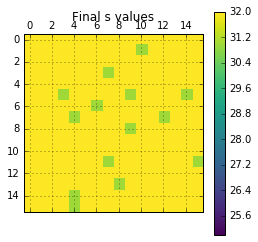

In [66]:
plt.matshow(final_s.reshape(16,16), vmin=25, vmax=32)
plt.grid(visible=True)
plt.title('Final s values')
plt.colorbar()

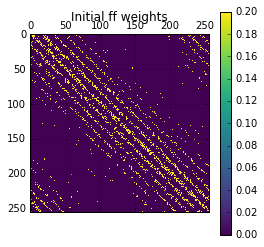

In [67]:
plt.matshow(init_ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial ff weights')
plt.colorbar()

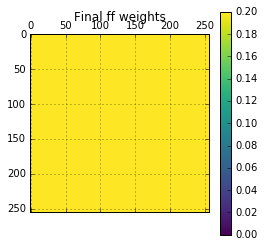

In [68]:
plt.matshow(ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Final ff weights')
plt.colorbar()

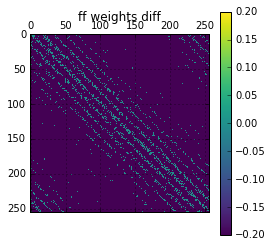

In [69]:
plt.matshow(init_ff_w.reshape(16**2,16**2) - ff_w.reshape(16**2,16**2), vmin=-.2, vmax=.2)
plt.grid(visible=True)
plt.title('ff weights diff')
plt.colorbar()

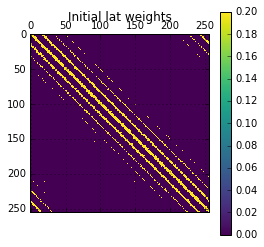

In [70]:
plt.matshow(init_lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial lat weights')
plt.colorbar()

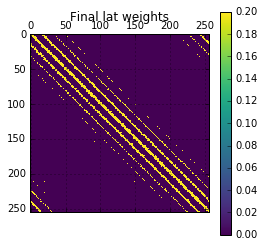

In [71]:
plt.matshow(lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Final lat weights')
plt.colorbar()

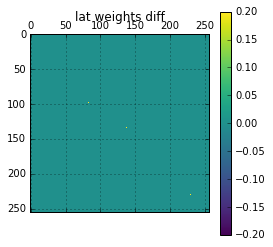

In [72]:
plt.matshow(init_lat_w.reshape(16**2,16**2)-lat_w.reshape(16**2,16**2), vmin=-.2, vmax=.2)
plt.grid(visible=True)
plt.title('lat weights diff')
plt.colorbar()

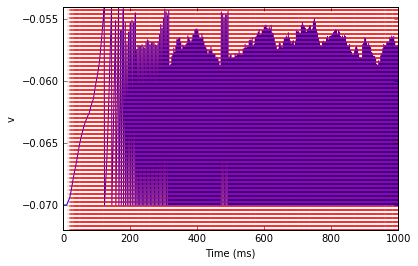

In [64]:
plt.plot(state[0])
plt.xlim(0, duration / ms)
for t in spikes.ravel()[0][0]:
    plt.axvline(t/ms, ls=':', c='r', lw=1, alpha=.3)
plt.xlabel('Time (ms)')
plt.ylabel('v')